* Shane Lindquist
* <span style="background-color: lemonchiffon
      ">sjl241@scarletmail.rutgers.edu</span>

Excercise 1
------------
* import the anscombe.csv file to a pandas dataframe and call info, shape, and summary stats

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/anscombe.csv")
df.shape

(44, 3)

In [18]:
df.info

<bound method DataFrame.info of      x      y  data
0   10   8.04     0
1    8   6.95     0
2   13   7.58     0
3    9   8.81     0
4   11   8.33     0
5   14   9.96     0
6    6   7.24     0
7    4   4.26     0
8   12  10.84     0
9    7   4.82     0
10   5   5.68     0
11  10   9.14     1
12   8   8.14     1
13  13   8.74     1
14   9   8.77     1
15  11   9.26     1
16  14   8.10     1
17   6   6.13     1
18   4   3.10     1
19  12   9.13     1
20   7   7.26     1
21   5   4.74     1
22  10   7.46     2
23   8   6.77     2
24  13  12.74     2
25   9   7.11     2
26  11   7.81     2
27  14   8.84     2
28   6   6.08     2
29   4   5.39     2
30  12   8.15     2
31   7   6.42     2
32   5   5.73     2
33   8   6.58     3
34   8   5.76     3
35   8   7.71     3
36   8   8.84     3
37   8   8.47     3
38   8   7.04     3
39   8   5.25     3
40  19  12.50     3
41   8   5.56     3
42   8   7.91     3
43   8   6.89     3>

In [17]:
df.describe()

,x,y,data
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,1.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,0.00000
25%,7.000000,6.117500,0.75000
50%,8.000000,7.520000,1.50000
75%,11.000000,8.747500,2.25000
max,19.000000,12.740000,3.00000


In [25]:
df

,x,y,data
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0
5,14,9.96,0
6,6,7.24,0
7,4,4.26,0
8,12,10.84,0
9,7,4.82,0


Class Exercise-2: Anscombe visualization
----------------------------------------

* Create 4 scatter plots with each showing a plot of $y_i$ and $x_i$ for $i$=1,2,3,4.
* Try out the other plots with the same data: displot, relplot, regplot, pairplot, and boxplot.

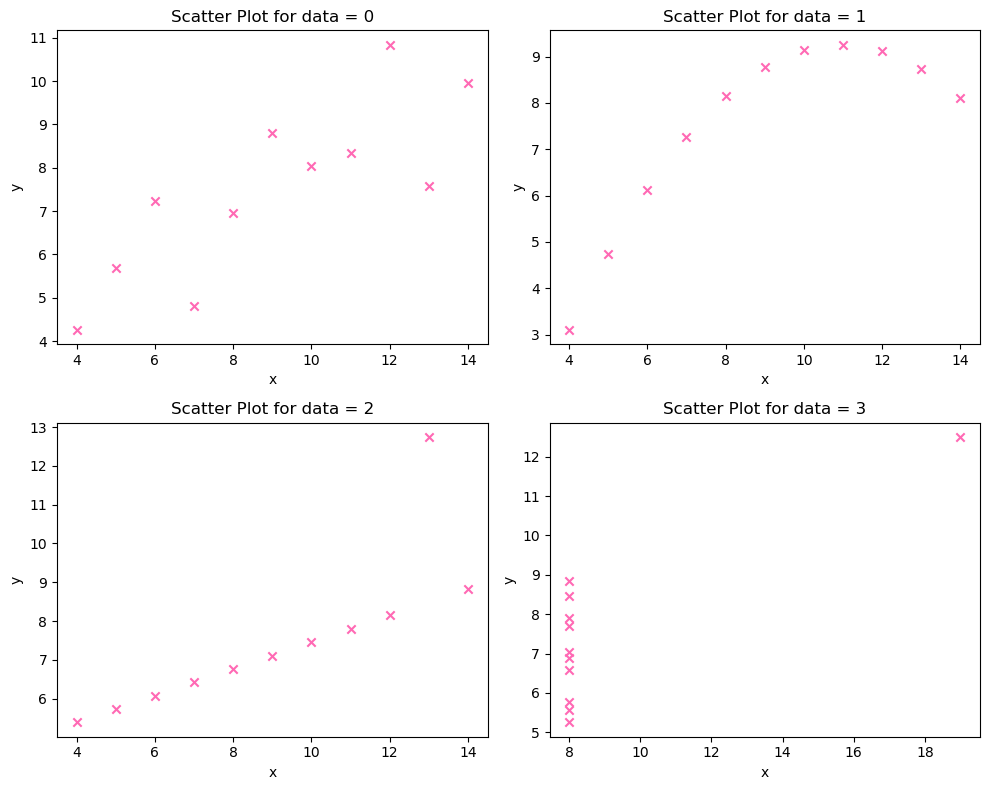

In [33]:
#4 Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    subset = df[df['data'] == i]
    ax.scatter(subset['x'], subset['y'], color='hotpink', marker='x')
    ax.set_title(f"Scatter Plot for data = {i}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

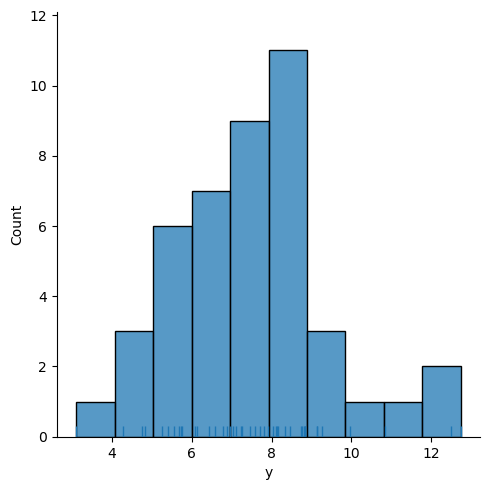

In [45]:
#displot
sns.displot(df['y'], kind='hist', bins=10, kde=False, rug=True)


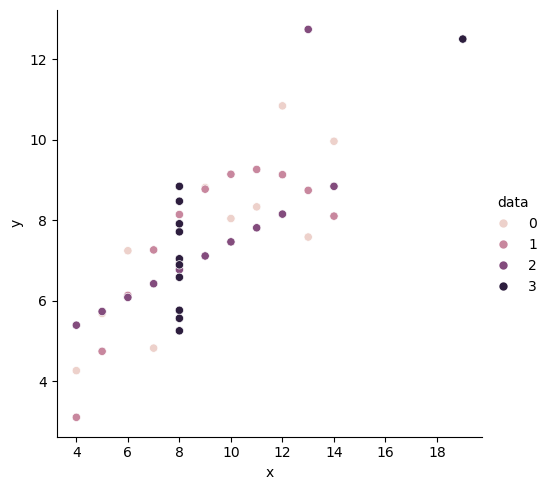

In [42]:
#relplot
sns.relplot(x="x", y="y", hue="data", data=df)

<Axes: xlabel='x', ylabel='y'>

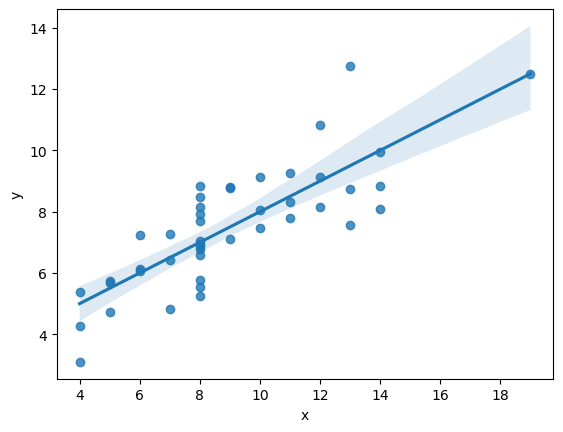

In [46]:
#regplot
sns.regplot(x="x", y="y", data=df)

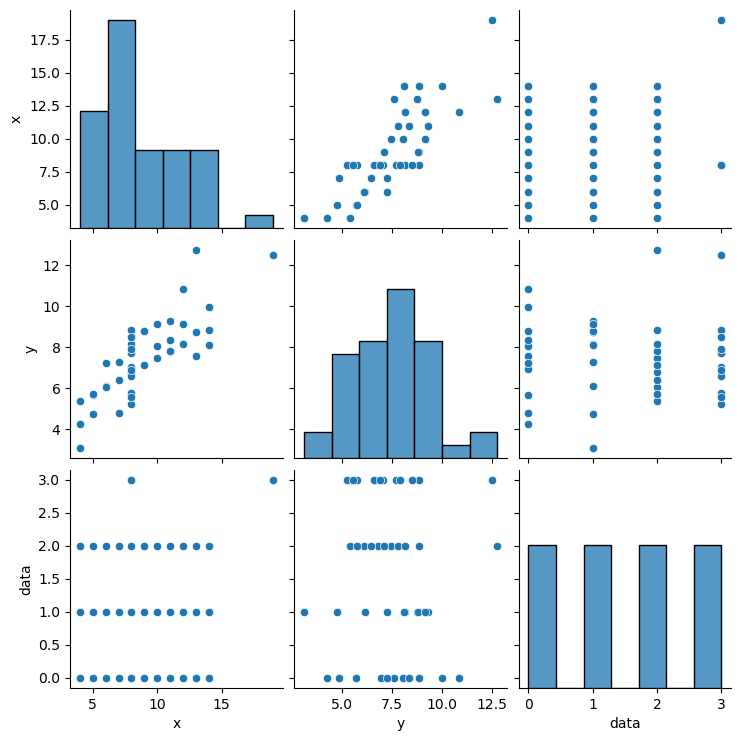

In [38]:
#pairplot
sns.pairplot(df)

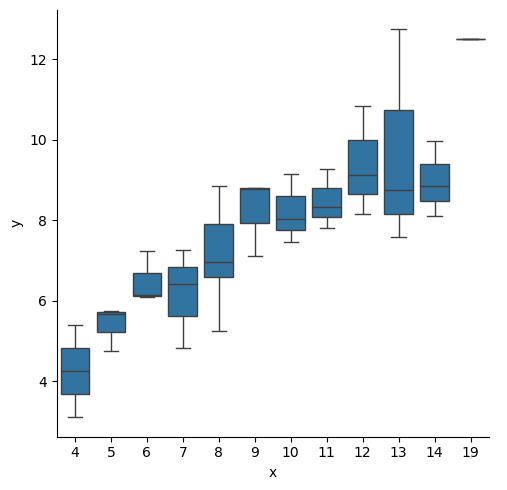

In [43]:
#boxplot
sns.catplot(x="x", y="y", kind="box", data=df)

Class Exercise-3: Choropleth maps
--------------------------------

Pick any variable of your choice and develop a choropleth map (similar to the female life expectancy at birth example).

In [48]:
#installing folium
#!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [92]:
import folium
import plotly.express as px
#data from the Folium package's GitHub repository
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # for US map with state boundaries
world_geo = f'{url}/world-countries.json' # for world map with country boundaries

state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
labordf = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/labor.csv")
labordf.head()

,STATE,Labor Force Participation Rate (%)
0,Alabama,56.906369
1,Alaska,70.514165
2,Arizona,58.806623
3,Arkansas,57.583463
4,California,63.043254


In [113]:
#changing the fully named state to it's abbreviation
us_state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}
labordf['State_Abbrev'] = labordf['STATE'].map(us_state_to_abbrev)

#dropping added nulls
labordf.dropna()
labordf.head()

,STATE,Labor Force Participation Rate (%),State_Abbrev
0,Alabama,56.906369,AL
1,Alaska,70.514165,AK
2,Arizona,58.806623,AZ
3,Arkansas,57.583463,AR
4,California,63.043254,CA


In [115]:
#setting up the map
map1 = folium.Map(location=[48, -102], zoom_start=3)

In [117]:
#choropleth plot
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=labordf,
    columns=['State_Abbrev', 'Labor Force Participation Rate (%)'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(map1)

In [118]:
folium.LayerControl().add_to(map1)


In [119]:
map1